<a href="https://colab.research.google.com/github/jcdevaney/data71200f25/blob/main/nov11/data71200nov11labAnswerKey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load wine dataset

In [2]:
from sklearn.datasets import load_wine
dataset = load_wine()

# Testing/Training Split

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    dataset.data, dataset.target, stratify=dataset.target, random_state=66,test_size=0.2)

# Decision Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

tree = DecisionTreeClassifier(max_depth=4,random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

## Testing/Training Split Evaluation

In [32]:
# Accuracy
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.993
Accuracy on test set: 0.917


In [6]:
# Classification Report
print(classification_report(y_test, tree.predict(X_test),
                            target_names=["class 1", "class 2","class 3"]))

              precision    recall  f1-score   support

     class 1       1.00      0.92      0.96        12
     class 2       0.88      1.00      0.93        14
     class 3       1.00      0.90      0.95        10

    accuracy                           0.94        36
   macro avg       0.96      0.94      0.95        36
weighted avg       0.95      0.94      0.94        36



## Cross Validation (from Oct 21 notebook)

In [7]:
from sklearn.model_selection import cross_val_score

tree_cv = DecisionTreeClassifier(random_state=0)

#5-fold cross validation
cv_scores_all = cross_val_score(tree, dataset.data, dataset.target, cv=5)

print("cv_scores:\n{}".format(cv_scores_all))
print("cv_scores mean:\n{}".format(np.mean(cv_scores_all)))

cv_scores:
[0.94444444 0.83333333 0.88888889 0.91428571 0.85714286]
cv_scores mean:
0.8876190476190475


# Random Forest

In [8]:
from sklearn.ensemble import RandomForestClassifier

## Testing/Training Split Evaluation

In [9]:
# Accuracy

forest = RandomForestClassifier(n_estimators=5, random_state=2)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.917


In [10]:
# Classification Report

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))
print(classification_report(y_test, forest.predict(X_test),
                            target_names=["class 1", "class 2","class 3"]))

Accuracy on training set: 1.000
Accuracy on test set: 0.917
              precision    recall  f1-score   support

     class 1       1.00      0.92      0.96        12
     class 2       0.92      0.86      0.89        14
     class 3       0.83      1.00      0.91        10

    accuracy                           0.92        36
   macro avg       0.92      0.92      0.92        36
weighted avg       0.92      0.92      0.92        36



## Cross Validation

In [11]:
forest_cv = RandomForestClassifier(n_estimators=5, random_state=2)

#5-fold cross validation
cv_scores_forest = cross_val_score(forest_cv, dataset.data, dataset.target, cv=5)

print("cv_scores:\n{}".format(cv_scores_forest))
print("cv_scores mean:\n{}".format(np.mean(cv_scores_forest)))

cv_scores:
[0.88888889 0.86111111 0.97222222 0.94285714 0.94285714]
cv_scores mean:
0.9215873015873017


## Feature Importances

In [12]:
# print list of feature importances
print("Feature importances:")
print(forest.feature_importances_)

Feature importances:
[0.12291224 0.03731939 0.00391529 0.08087689 0.01276846 0.
 0.21331461 0.0156036  0.0471268  0.05951766 0.10884462 0.09804357
 0.19975687]


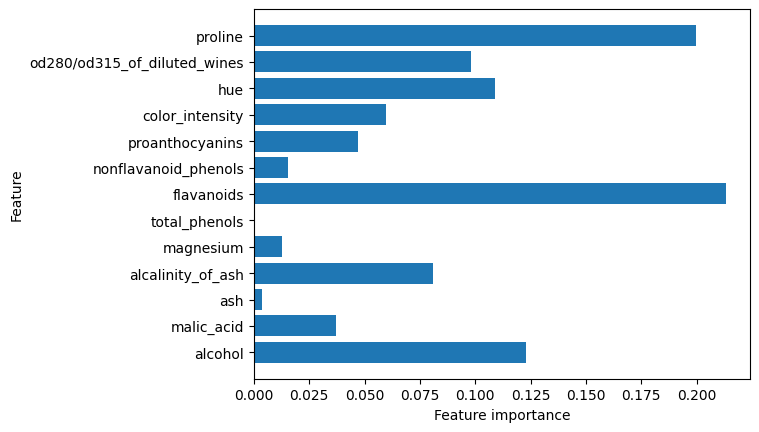

In [13]:
# plot feature importances
# assume the scikit-learn dataset has been imported as dataset
def plot_feature_importances(model):
    n_features = dataset.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), dataset.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(forest)

# Support Vector Machines

In [14]:
from sklearn.svm import SVC

## Testing/Training Split Evaluation

In [15]:
# polynomial kernel
# accuracy
svmPoly1 = SVC(kernel='poly', C=10).fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svmPoly1.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svmPoly1.score(X_test, y_test)))

Accuracy on training set: 0.70
Accuracy on test set: 0.69


In [16]:
# polynomial kernel
# classification report
print("Accuracy on training set: {:.3f}".format(svmPoly1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(svmPoly1.score(X_test, y_test)))
print(classification_report(y_test, svmPoly1.predict(X_test),
                            target_names=["class 1", "class 2","class 3"]))

Accuracy on training set: 0.697
Accuracy on test set: 0.694
              precision    recall  f1-score   support

     class 1       0.75      0.75      0.75        12
     class 2       0.73      0.79      0.76        14
     class 3       0.56      0.50      0.53        10

    accuracy                           0.69        36
   macro avg       0.68      0.68      0.68        36
weighted avg       0.69      0.69      0.69        36



In [17]:
# radial basis function kernel
svmRBF1 = SVC(kernel='rbf', C=10, gamma=0.1).fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svmRBF1.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svmRBF1.score(X_test, y_test)))

Accuracy on training set: 1.00
Accuracy on test set: 0.44


In [18]:
# radial basis function kernel
# classification report
print("Accuracy on training set: {:.3f}".format(svmRBF1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(svmRBF1.score(X_test, y_test)))
print(classification_report(y_test, svmRBF1.predict(X_test),
                            target_names=["class 1", "class 2","class 3"]))

Accuracy on training set: 1.000
Accuracy on test set: 0.444
              precision    recall  f1-score   support

     class 1       1.00      0.08      0.15        12
     class 2       0.41      1.00      0.58        14
     class 3       1.00      0.10      0.18        10

    accuracy                           0.44        36
   macro avg       0.80      0.39      0.31        36
weighted avg       0.77      0.44      0.33        36



## Parameter Selection with Grid Search


In [19]:
# import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

# import GridSearchCV and set ranges for C and gamma and create the paramter grid
from sklearn.model_selection import GridSearchCV
C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)

In [33]:
# polynomial kernel
gridPoly = GridSearchCV(SVC(kernel='poly'), param_grid=param_grid, cv=cv)
gridPoly.fit(X_train, y_train)

print("The best parameters are %s with a score of %0.2f"
      % (gridPoly.best_params_, gridPoly.best_score_))

The best parameters are {'C': np.float64(1.0), 'gamma': np.float64(0.0001)} with a score of 0.94


In [34]:
# radial basis function kernel
gridPoly = GridSearchCV(SVC(kernel='rbf'), param_grid=param_grid, cv=cv)
gridPoly.fit(X_train, y_train)

print("The best parameters are %s with a score of %0.2f"
      % (gridPoly.best_params_, gridPoly.best_score_))

The best parameters are {'C': np.float64(100000000.0), 'gamma': np.float64(1e-08)} with a score of 0.93


## Feature Scaling

### Scale the Features

In [35]:
# Compute the minimum value per feature on the training set
min_on_training = X_train.min(axis=0)

# Compute the range of each feature (max - min) on the training set
range_on_training = (X_train - min_on_training).max(axis=0)

# subtract the min, divide by range
# afterward, min=0 and max=1 for each feature
X_train_scaled = (X_train - min_on_training) / range_on_training
print("Minimum for each feature\n", X_train_scaled.min(axis=0))
print("Maximum for each feature\n", X_train_scaled.max(axis=0))

Minimum for each feature
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Maximum for each feature
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [36]:
# use THE SAME transformation on the test set,
# using min and range of the training set. See Chapter 3 (unsupervised learning) for details.
X_test_scaled = (X_test - min_on_training) / range_on_training

### Run Grid Search with the Polynomial Kernel with Scaled Features

In [37]:
# run grid search
gridPoly2 = GridSearchCV(SVC(kernel='poly'), param_grid=param_grid, cv=cv)
gridPoly2.fit(X_train_scaled, y_train)

# print the best parameters
print("The best parameters are %s with a score of %0.2f"
      % (gridPoly2.best_params_, gridPoly2.best_score_))

The best parameters are {'C': np.float64(0.01), 'gamma': np.float64(10.0)} with a score of 0.95


### Run the Poly SVM on the Scaled Features with the Best Parameters and Print the Results

In [38]:
svmPolyScaled = SVC(kernel='poly', C=0.1, gamma=10).fit(X_train_scaled, y_train)

print('Scaled Features')
print("Accuracy on training set: {:.3f}".format(
        svmPolyScaled.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svmPolyScaled.score(X_test_scaled, y_test)))

Scaled Features
Accuracy on training set: 1.000
Accuracy on test set: 0.972


### Run Grid Search with the RBF Kernel with Scaled Features

In [39]:
# run grid search
gridRBF2 = GridSearchCV(SVC(kernel='rbf'), param_grid=param_grid, cv=cv)
gridRBF2.fit(X_train_scaled, y_train)

# print the best parameters
print("The best parameters are %s with a score of %0.2f"
      % (gridRBF2.best_params_, gridRBF2.best_score_))

The best parameters are {'C': np.float64(1.0), 'gamma': np.float64(0.1)} with a score of 0.97


### Run the RBF SVM on the Scaled Features with the Best Paramters and Print the Results

In [40]:
svmRBFscaled = SVC(kernel='rbf', C=10000000.0, gamma=1e-06, probability=True).fit(X_train_scaled, y_train)

print('Scaled Features')
print("Accuracy on training set: {:.3f}".format(
        svmRBFscaled.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svmRBFscaled.score(X_test_scaled, y_test)))

Scaled Features
Accuracy on training set: 1.000
Accuracy on test set: 1.000
